## Comparing experiments

This norebook is used to compare the results accross experiments containing different candiate algorithms

In [8]:
import pickle
import numpy as np
import pandas as pd
import os

from nsga_population import *
from typing import List
from individual import Individual

import matplotlib.pyplot as plt
import seaborn as sns

log_base = "..\\..\\logdata\\"
experiment_folders = ["Experiment_1_2024-10-06_18_19_22_018319", "Experiment_1_2024-10-06_18_56_47_765092", "Experiment_1_2024-09-27_classical_1"] #["Experiment_1_2024-09-27_classical_1", "Experiment_1_2024-09-30_12_05_58_215187", "Experiment_1_2024-09-30_13_51_09_109136", "Experiment_1_2024-09-30_15_31_13_949606"]


Obtaining the filenames of the log files in the current experiment

In [9]:
df_list = []
for experiment_folder in experiment_folders:
    cur_experiment_path = os.path.join(log_base, experiment_folder)
    filenames = os.listdir(cur_experiment_path)
    for f_name in filenames:
        if f_name[-4:] == ".csv":
            # identify the csv files
            cur_csv_path = os.path.join(os.path.join(log_base, experiment_folder), f_name)
            test_df = pd.read_csv(cur_csv_path, index_col=False)
            result_df = test_df[test_df["Iteration"] == test_df["Iteration"].max()].reset_index(drop=True)
            result_df = result_df[result_df["Problem"].isin(["ft06", "ft10", "ft20"])]
            # Add column
            result_df["Experiment"] = pd.Series([experiment_folder for i in range(result_df.shape[0])])
            df_list.append(result_df)

comp_df = pd.concat(df_list)        

In [10]:
plot_df = comp_df.groupby(["Experiment", "Problem", "Candidate"]).agg({col_name : {"mean", "std"} for col_name in comp_df.columns[5:-1]})
plot_df

Min Makespan  \
                                                                                   std   
Experiment                              Problem Candidate                                
Experiment_1_2024-09-27_classical_1     ft06    classical                     0.000000   
                                        ft10    classical                    18.659522   
                                        ft20    classical                    16.965324   
Experiment_1_2024-10-06_18_19_22_018319 ft06    quantum_base_encoding              NaN   
Experiment_1_2024-10-06_18_56_47_765092 ft06    quantum_position_encoding          NaN   

                                                                                   \
                                                                             mean   
Experiment                              Problem Candidate                           
Experiment_1_2024-09-27_classical_1     ft06    classical                    58.0   
                                        ft10    classical                  1033.2   
                                        ft20    classical                  1331.6   
Experiment_1_2024-10-06_18_19_22_018319 ft06    quantum_base_encoding        59.0   
Experiment_1_2024-10-06_18_56_47_765092 ft06    quantum_position_encoding    58.0   

                                                                          Max Makespan  \
                                                                                   std   
Experiment                              Problem Candidate                                
Experiment_1_2024-09-27_classical_1     ft06    classical                     4.033196   
                                        ft10    classical                    67.527854   
                                        ft20    classical                    38.754068   
Experiment_1_2024-10-06_18_19_22_018319 ft06    quantum_base_encoding              NaN   
Experiment_1_2024-10-06_18_56_47_765092 ft06    quantum_position_encoding          NaN   

                                                                                   \
                                                                             mean   
Experiment                              Problem Candidate                           
Experiment_1_2024-09-27_classical_1     ft06    classical                    60.4   
                                        ft10    classical                  1087.7   
                                        ft20    classical                  1388.9   
Experiment_1_2024-10-06_18_19_22_018319 ft06    quantum_base_encoding        59.0   
Experiment_1_2024-10-06_18_56_47_765092 ft06    quantum_position_encoding    58.0   

                                                                          Avg Makespan  \
                                                                                   std   
Experiment                              Problem Candidate                                
Experiment_1_2024-09-27_classical_1     ft06    classical                     1.705060   
                                        ft10    classical                    33.123064   
                                        ft20    classical                    26.978046   
Experiment_1_2024-10-06_18_19_22_018319 ft06    quantum_base_encoding              NaN   
Experiment_1_2024-10-06_18_56_47_765092 ft06    quantum_position_encoding          NaN   

                                                                                        \
                                                                                  mean   
Experiment                              Problem Candidate                                
Experiment_1_2024-09-27_classical_1     ft06    classical                    59.008837   
                                        ft10    classical                  1057.250000   
                                        ft20    classical                  1359.428333   
Experimen

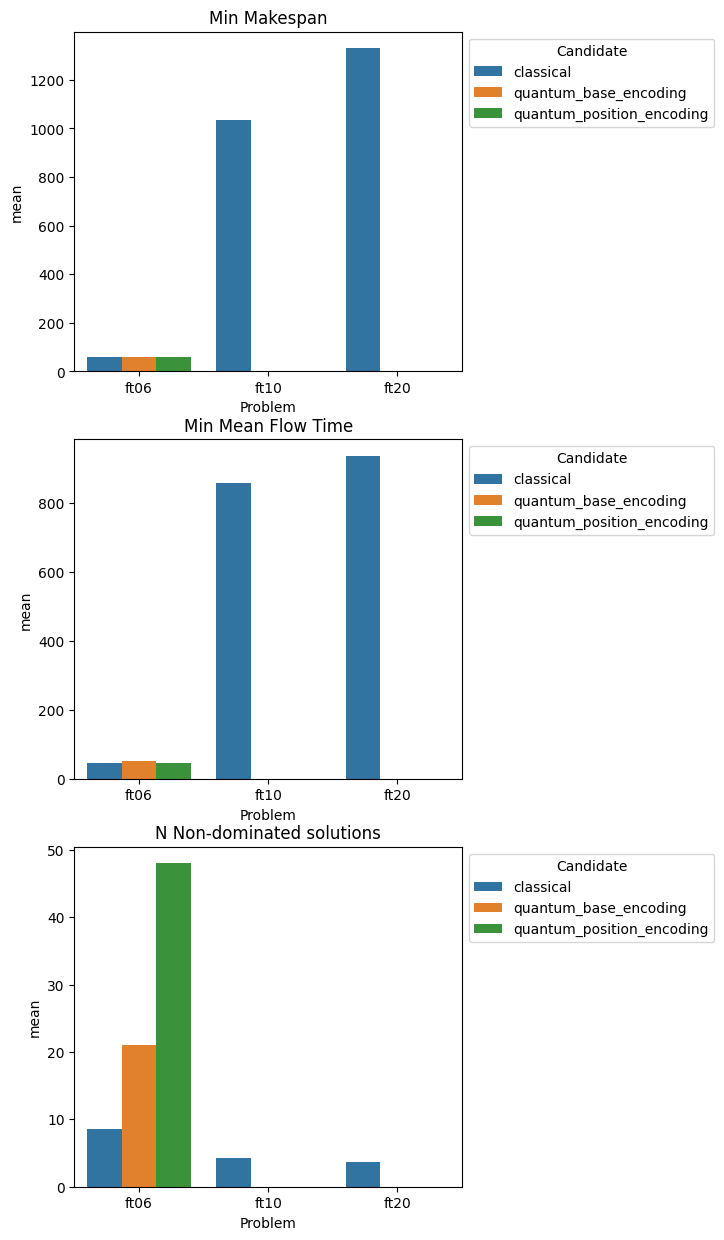

In [11]:
fig, ax = plt.subplots(3, 1, figsize=(5, 15))
ax[0].set_title("Min Makespan")
ax[1].set_title("Min Mean Flow Time")
ax[2].set_title("N Non-dominated solutions")

sns_ax_1 = sns.barplot(data=plot_df["Min Makespan"], x="Problem", y="mean", hue="Candidate", ax=ax[0])
sns.move_legend(sns_ax_1, "upper left", bbox_to_anchor=(1, 1))

sns_ax_2 = sns.barplot(data=plot_df["Min Mean Flow Time"], x="Problem", y="mean", hue="Candidate", ax=ax[1])
sns.move_legend(sns_ax_2, "upper left", bbox_to_anchor=(1, 1))

sns_ax_3 = sns.barplot(data=plot_df["N Non-dominated solutions"], x="Problem", y="mean", hue="Candidate", ax=ax[2])
sns.move_legend(sns_ax_3, "upper left", bbox_to_anchor=(1, 1))

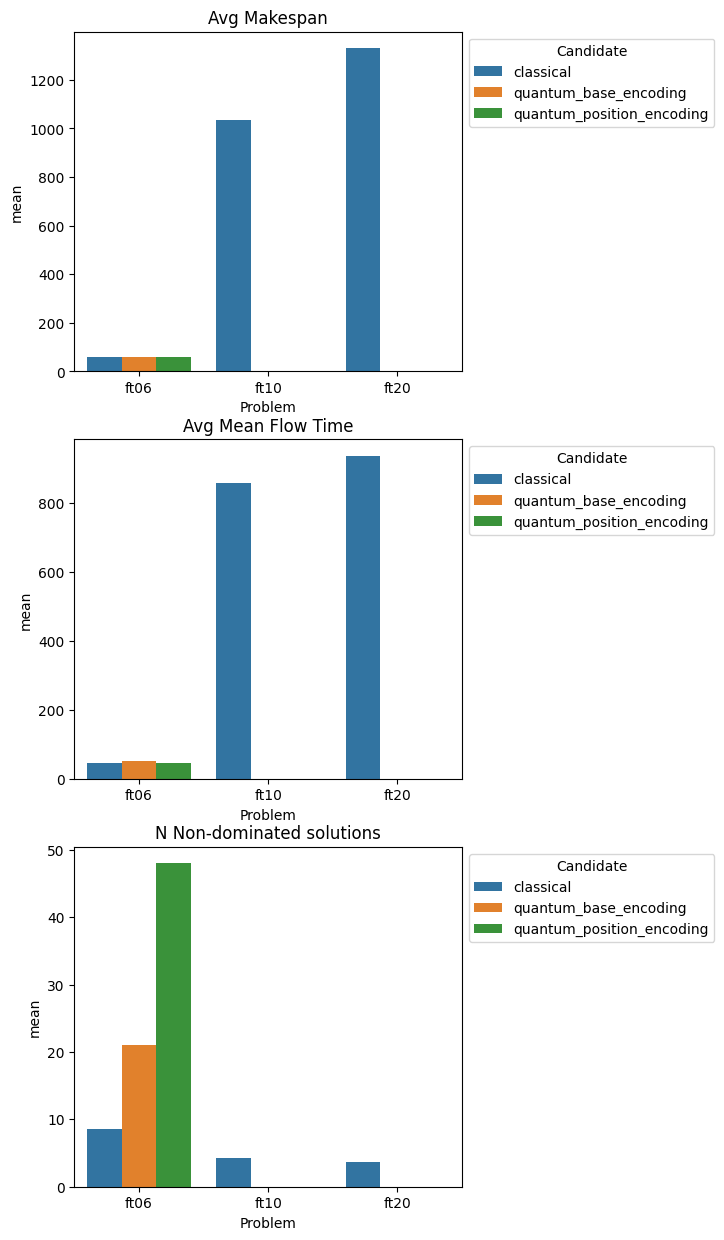

In [12]:
fig, ax = plt.subplots(3, 1, figsize=(5, 15))
ax[0].set_title("Avg Makespan")
ax[1].set_title("Avg Mean Flow Time")
ax[2].set_title("N Non-dominated solutions")

sns_ax_1 = sns.barplot(data=plot_df["Min Makespan"], x="Problem", y="mean", hue="Candidate", ax=ax[0])
sns.move_legend(sns_ax_1, "upper left", bbox_to_anchor=(1, 1))

sns_ax_2 = sns.barplot(data=plot_df["Min Mean Flow Time"], x="Problem", y="mean", hue="Candidate", ax=ax[1])
sns.move_legend(sns_ax_2, "upper left", bbox_to_anchor=(1, 1))

sns_ax_3 = sns.barplot(data=plot_df["N Non-dominated solutions"], x="Problem", y="mean", hue="Candidate", ax=ax[2])
sns.move_legend(sns_ax_3, "upper left", bbox_to_anchor=(1, 1))